### We look a bit more in-depth at simple strategies in this sheet, using pyfolio to generate tearsheets for us to better understand their characteristics

In [1]:
# imports
import pandas as pd
import numpy as np
from scipy import stats

import sklearn
from sklearn import preprocessing as pp

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

import sys
#import tensorflow as tf
import time
import os
import os.path
import pickle
import logging as log
log.basicConfig(level=log.DEBUG)

import quandl
import pyfolio as pf

In [2]:
f = 'U.pkl'
P = pickle.load(open(f))
log.info('loaded <%s>',f)
P.describe()

INFO:root:loaded <U.pkl>


Multiplier          Open          High           Low         Close  \
count   2724764.0  2.724764e+06  2.724764e+06  2.724764e+06  2.724764e+06   
mean          1.0  2.215008e+02  2.231130e+02  2.196180e+02  2.214584e+02   
std           0.0  4.991186e+03  5.017957e+03  4.954869e+03  4.988316e+03   
min           1.0  1.455814e-02  7.864865e-02  1.455814e-02  5.898649e-02   
25%           1.0  1.536748e+01  1.561154e+01  1.511040e+01  1.536988e+01   
50%           1.0  2.657455e+01  2.694697e+01  2.619165e+01  2.657768e+01   
75%           1.0  4.503896e+01  4.558309e+01  4.448370e+01  4.504896e+01   
max           1.0  2.281800e+05  2.293740e+05  2.275300e+05  2.293000e+05   

             Volume           ADV        DeltaV        Return     Fwd_Close  \
count  2.724764e+06  2.724763e+06  2.724763e+06  2.724763e+06  2.724764e+06   
mean   4.027689e+06  4.026459e+06  1.702058e-04  2.973546e-04  2.215280e+02   
std    1.211738e+07  1.086434e+07  4.786785e-01  2.759233e-02  4.989924e+03   
min    4.300000e+01  1.000000e+02 -9.486203e+00 -3.570812e+00  5.898649e-02   
25%    6.148695e+05  6.998400e+05 -2.779098e-01 -1.030937e-02  1.537368e+01   
50%    1.469000e+06  1.588625e+06 -1.154195e-02  2.253521e-04  2.658442e+01   
75%    3.604000e+06  3.718508e+06  2.617788e-01  1.104984e-02  4.506024e+01   
max    2.304019e+09  6.079510e+08  1.032482e+01  1.449269e+00  2.293000e+05   

         Fwd_Return            SD      Fwd_Open  Fwd_COReturn  
count  2.724764e+06  2.724761e+06  2.724764e+06  2.724764e+06  
mean   2.973605e-04  2.210898e-02  2.215697e+02  3.162821e-04  
std    2.759232e-02  1.671605e-02  4.992777e+03  1.403611e-02  
min   -3.570812e+00  0.000000e+00  1.455814e-02 -9.997442e-01  
25%   -1.030937e-02  1.217616e-02  1.537115e+01 -3.635419e-03  
50%    2.253521e-04  1.760705e-02  2.658075e+01  0.000000e+00  
75%    1.104984e-02  2.643420e-02  4.505000e+01  4.248745e-03  
max    1.449269e+00  8.122759e-01  2.281800e+05  3.078370e+00

In [10]:
# let's skip the dotcom period 
U = P[P.index >= '2005-01-01']
U.describe()

Multiplier          Open          High           Low         Close        Volume           ADV        DeltaV        Return     Fwd_Close    Fwd_Return            SD      Fwd_Open  Fwd_COReturn
count   1913324.0  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06  1.913324e+06
mean          1.0  2.577162e+02  2.594933e+02  2.555658e+02  2.576413e+02  4.515743e+06  4.513595e+06  2.663209e-04  2.387168e-04  2.577223e+02  2.437021e-04  2.037463e-02  2.577963e+02  3.002846e-04
std           0.0  5.655715e+03  5.685227e+03  5.614278e+03  5.651925e+03  1.328709e+07  1.195503e+07  4.317404e-01  2.568432e-02  5.653736e+03  2.567675e-02  1.574989e-02  5.657503e+03  1.332797e-02
min           1.0  7.864865e-02  7.864865e-02  4.915541e-02  5.898649e-02  4.300000e+01  1.685500e+02 -9.486203e+00 -3.273741e+00  5.898649e-02 -3.273741e+00  0.000000e+00  7.864865e-02 -9.599594e-01
25%           1.0  1.955196e+01  1.984478e+01  1.925675e+01  1.955604e+01  7.685718e+05  8.573517e+05 -2.613779e-01 -9.538086e-03  1.956000e+01 -9.528923e-03  1.146917e-02  1.955581e+01 -3.647971e-03
50%           1.0  3.245000e+01  3.285511e+01  3.202727e+01  3.245500e+01  1.731800e+06  1.861243e+06 -1.084305e-02  3.390405e-04  3.246316e+01  3.426418e-04  1.623789e-02  3.245867e+01  0.000000e+00
75%           1.0  5.264647e+01  5.323547e+01  5.204716e+01  5.265494e+01  4.059000e+06  4.161701e+06  2.466339e-01  1.033758e-02  5.267028e+01  1.033898e-02  2.394063e-02  5.266066e+01  4.284490e-03
max           1.0  2.281800e+05  2.293740e+05  2.275300e+05  2.293000e+05  2.304019e+09  6.079510e+08  1.032482e+01  1.356115e+00  2.293000e+05  1.356115e+00  7.328309e-01  2.281800e+05  3.078370e+00

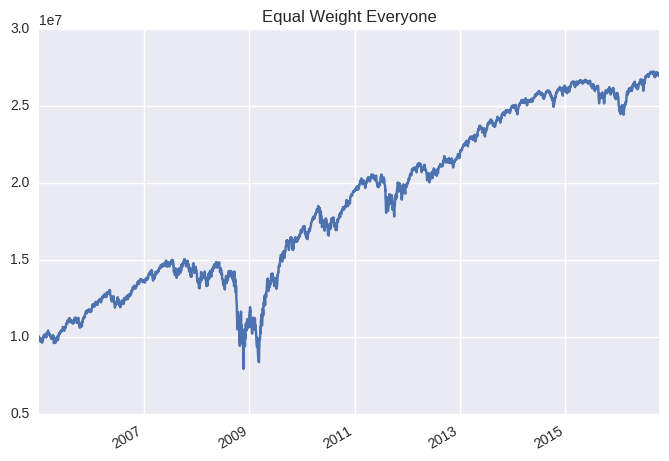

In [22]:
import sim
#_,B = sim.sim(U)
# plot NAV
B.NAV.plot(title='Equal Weight Everyone')

Entire data start date: 2005-01-03
Entire data end date: 2016-10-14


Backtest Months: 141


Performance statistics   Backtest
annual_return                0.09
annual_volatility            0.18
sharpe_ratio                 0.56
calmar_ratio                 0.18
stability_of_timeseries      0.95
max_drawdown                -0.47
omega_ratio                  1.14
sortino_ratio                0.81
skew                         0.51
kurtosis                    24.58
tail_ratio                   0.97
common_sense_ratio           1.05
information_ratio            0.01
alpha                         nan
beta                          nan

Worst Drawdown Periods net drawdown in %  peak date valley date recovery date duration
0                                  47.43 2007-10-09  2008-11-20    2009-08-04      476
1                                  13.32 2011-04-29  2011-10-03    2012-01-25      194
2                                  10.40 2010-04-23  2010-07-06    2010-11-02      138
3                                   8.76 2006-05-08  2006-06-13    2006-10-12      114
4                                   8.52 2015-05-18  2016-02-11    2016-06-08      278



[-0.022 -0.046]


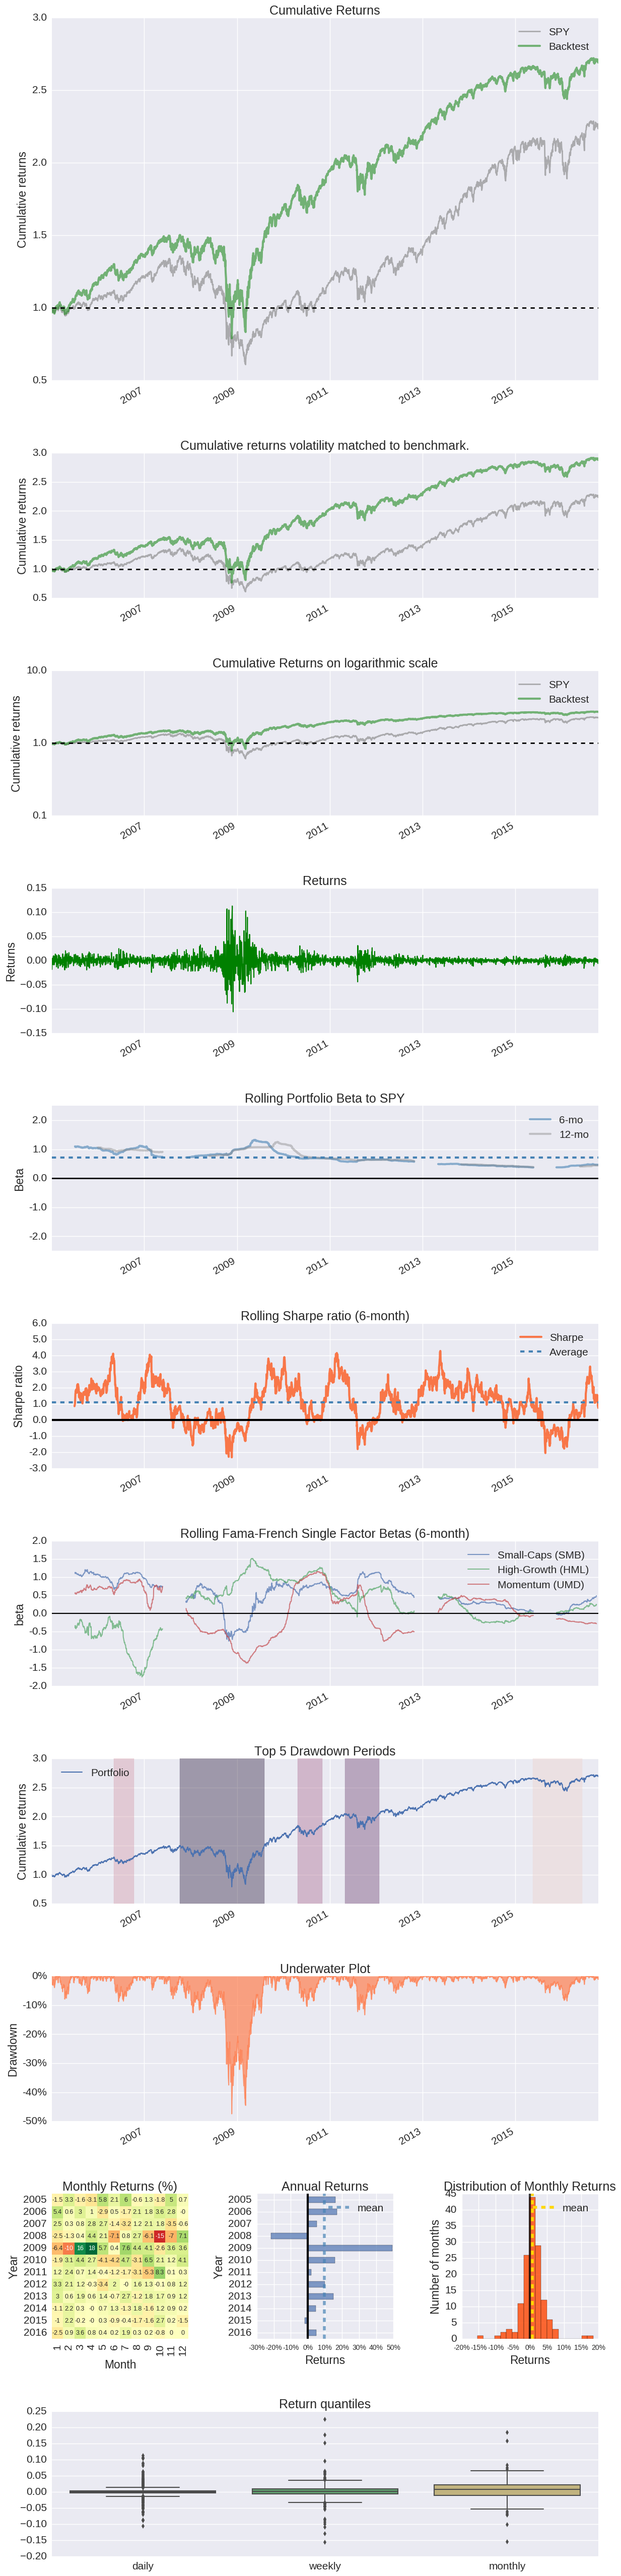

Stress Events                       mean     min    max
Lehmann                           -0.08%  -6.10%  3.96%
US downgrade/European Debt Crisis -0.03%  -4.36%  3.15%
Fukushima                          0.09%  -0.76%  0.87%
EZB IR Event                      -0.02%  -0.73%  0.66%
Aug07                              0.06%  -2.10%  1.71%
Mar08                              0.15%  -1.98%  3.27%
Sept08                            -0.28%  -6.10%  3.96%
2009Q1                            -0.41%  -6.36%  6.21%
2009Q2                             0.67%  -6.54% 10.28%
Flash Crash                       -0.16%  -1.92%  3.08%
Apr14                             -0.00%  -0.84%  0.43%
Oct14                              0.05%  -0.96%  0.86%
Fall2015                          -0.11%  -1.39%  1.21%
Low Volatility Bull Market         0.06%  -2.40%  2.51%
GFC Crash                         -0.03% -10.56% 11.31%
Recovery                           0.08%  -4.80%  5.44%
New Normal                         0.02%  -1.57%  1.26%

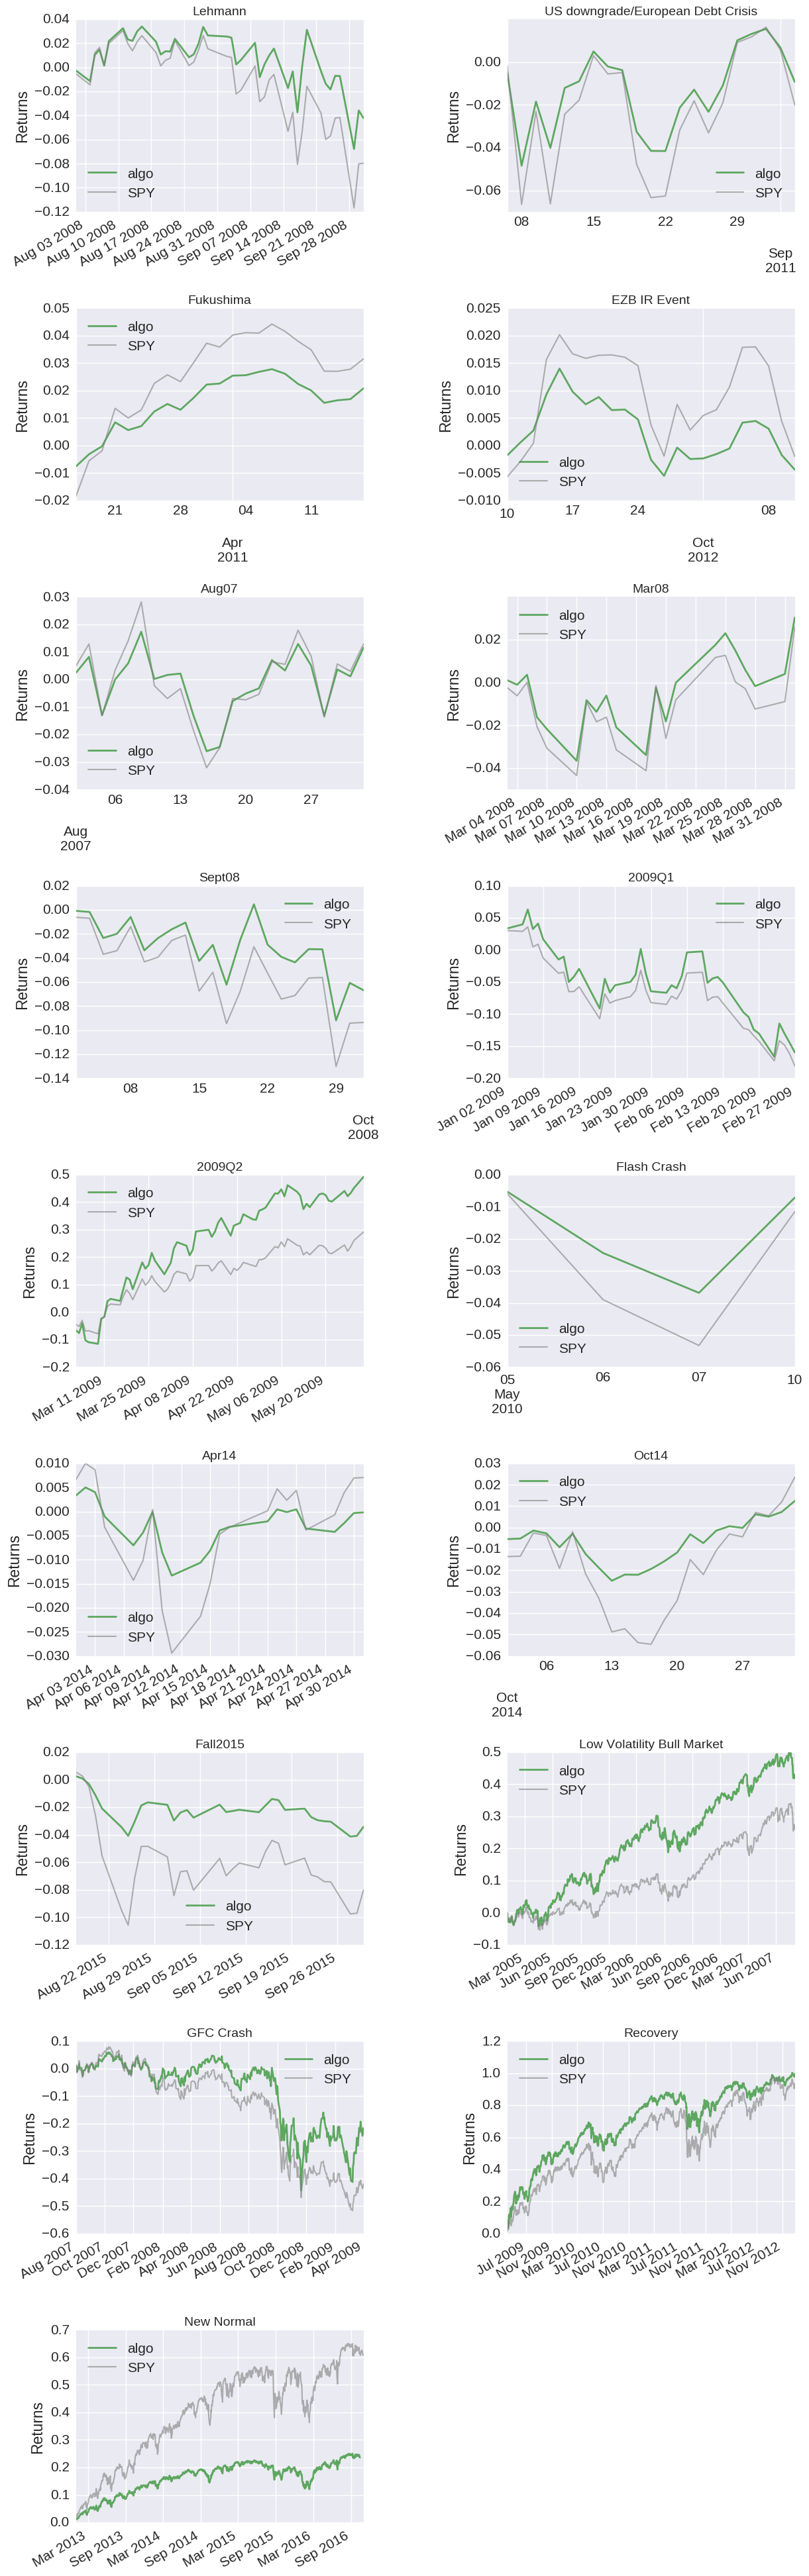

In [23]:
B.index=B.index.tz_localize('UTC')
pf.create_full_tear_sheet(B.NET_Return)

INFO:root:ran over 2971 days and 1913324 rows in 109 secs


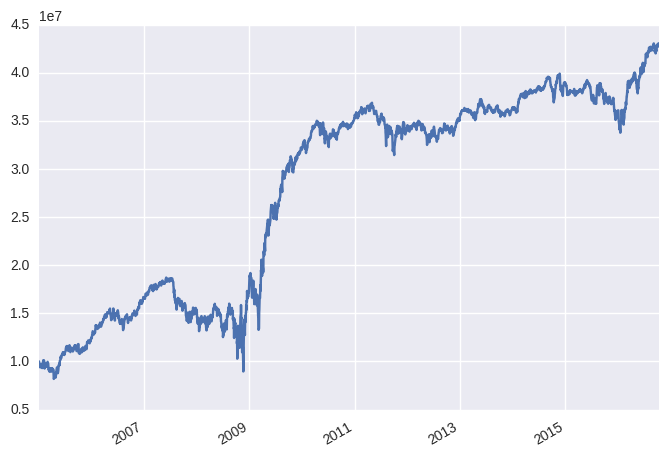

In [14]:
#quandl_auth = os.environ.get('QUANDL_AUTH', 'sCGfc5f6ph5H2wLATVVW')
#SPY = quandl.get("GOOG/NYSE_SPY", authtoken=quandl_auth)
#SPY.Close.plot()

_,Bw = sim.sim(U, sim_FUN=sim.worst_strat)
Bw.NAV.plot(title="Buy yesterday's 10 worst")

Entire data start date: 2005-01-03
Entire data end date: 2016-10-14


Backtest Months: 141


Performance statistics   Backtest
annual_return                0.13
annual_volatility            0.26
sharpe_ratio                 0.60
calmar_ratio                 0.25
stability_of_timeseries      0.90
max_drawdown                -0.52
omega_ratio                  1.16
sortino_ratio                0.95
skew                         2.31
kurtosis                    46.49
tail_ratio                   0.99
common_sense_ratio           1.12
information_ratio            0.02
alpha                         nan
beta                          nan

Worst Drawdown Periods net drawdown in %  peak date valley date recovery date duration
0                                  52.12 2007-06-04  2008-11-20    2009-01-02      415
1                                  30.76 2009-01-08  2009-03-06    2009-03-23       53
2                                  19.15 2005-02-02  2005-04-15    2005-05-31       85
3                                  15.39 2014-11-24  2016-01-19    2016-04-26      372
4                                  14.74 2011-05-02  2011-10-03    2013-05-20      536



[-0.032 -0.07 ]


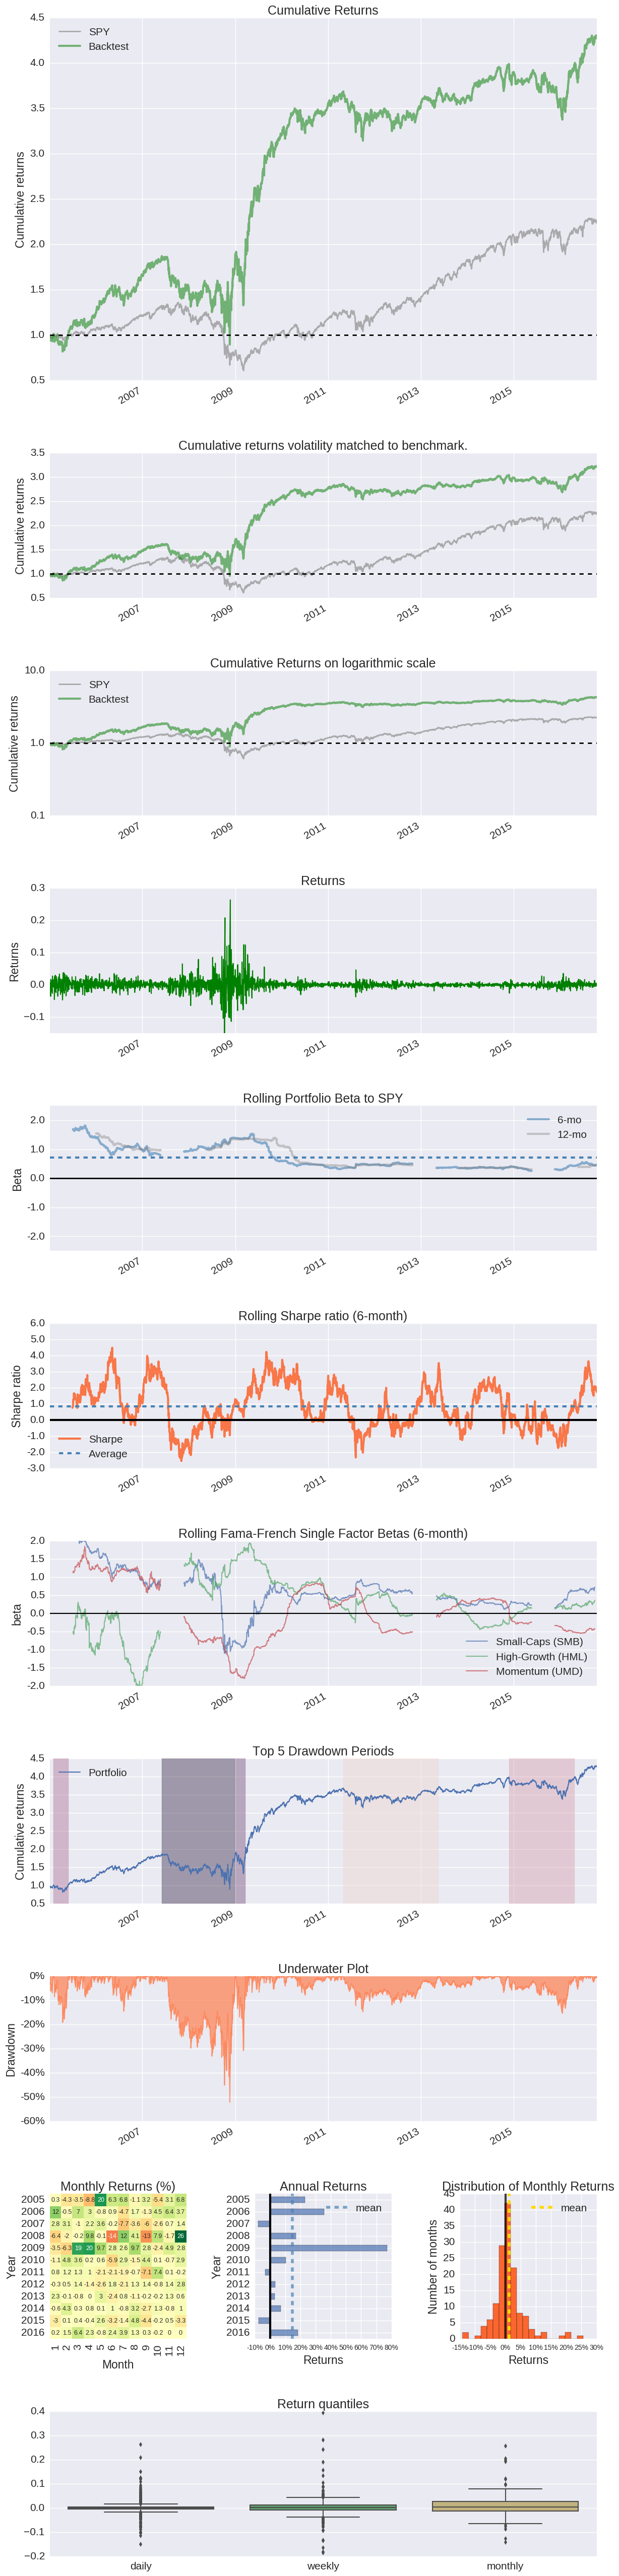

Stress Events                       mean     min    max
Lehmann                           -0.16% -10.37%  8.85%
US downgrade/European Debt Crisis  0.00%  -3.71%  4.64%
Fukushima                          0.04%  -0.86%  0.76%
EZB IR Event                       0.02%  -1.06%  0.73%
Aug07                             -0.14%  -3.28%  2.35%
Mar08                              0.17%  -3.50%  7.92%
Sept08                            -0.52% -10.37%  8.85%
2009Q1                            -0.21%  -7.95%  7.09%
2009Q2                             0.80%  -7.70% 12.47%
Flash Crash                        0.02%  -1.60%  2.56%
Apr14                              0.04%  -1.07%  1.05%
Oct14                              0.06%  -1.45%  1.06%
Fall2015                          -0.12%  -1.57%  2.54%
Low Volatility Bull Market         0.09%  -4.66%  3.80%
GFC Crash                          0.10% -14.99% 26.37%
Recovery                           0.07%  -4.08%  9.38%
New Normal                         0.02%  -2.54%  3.56%

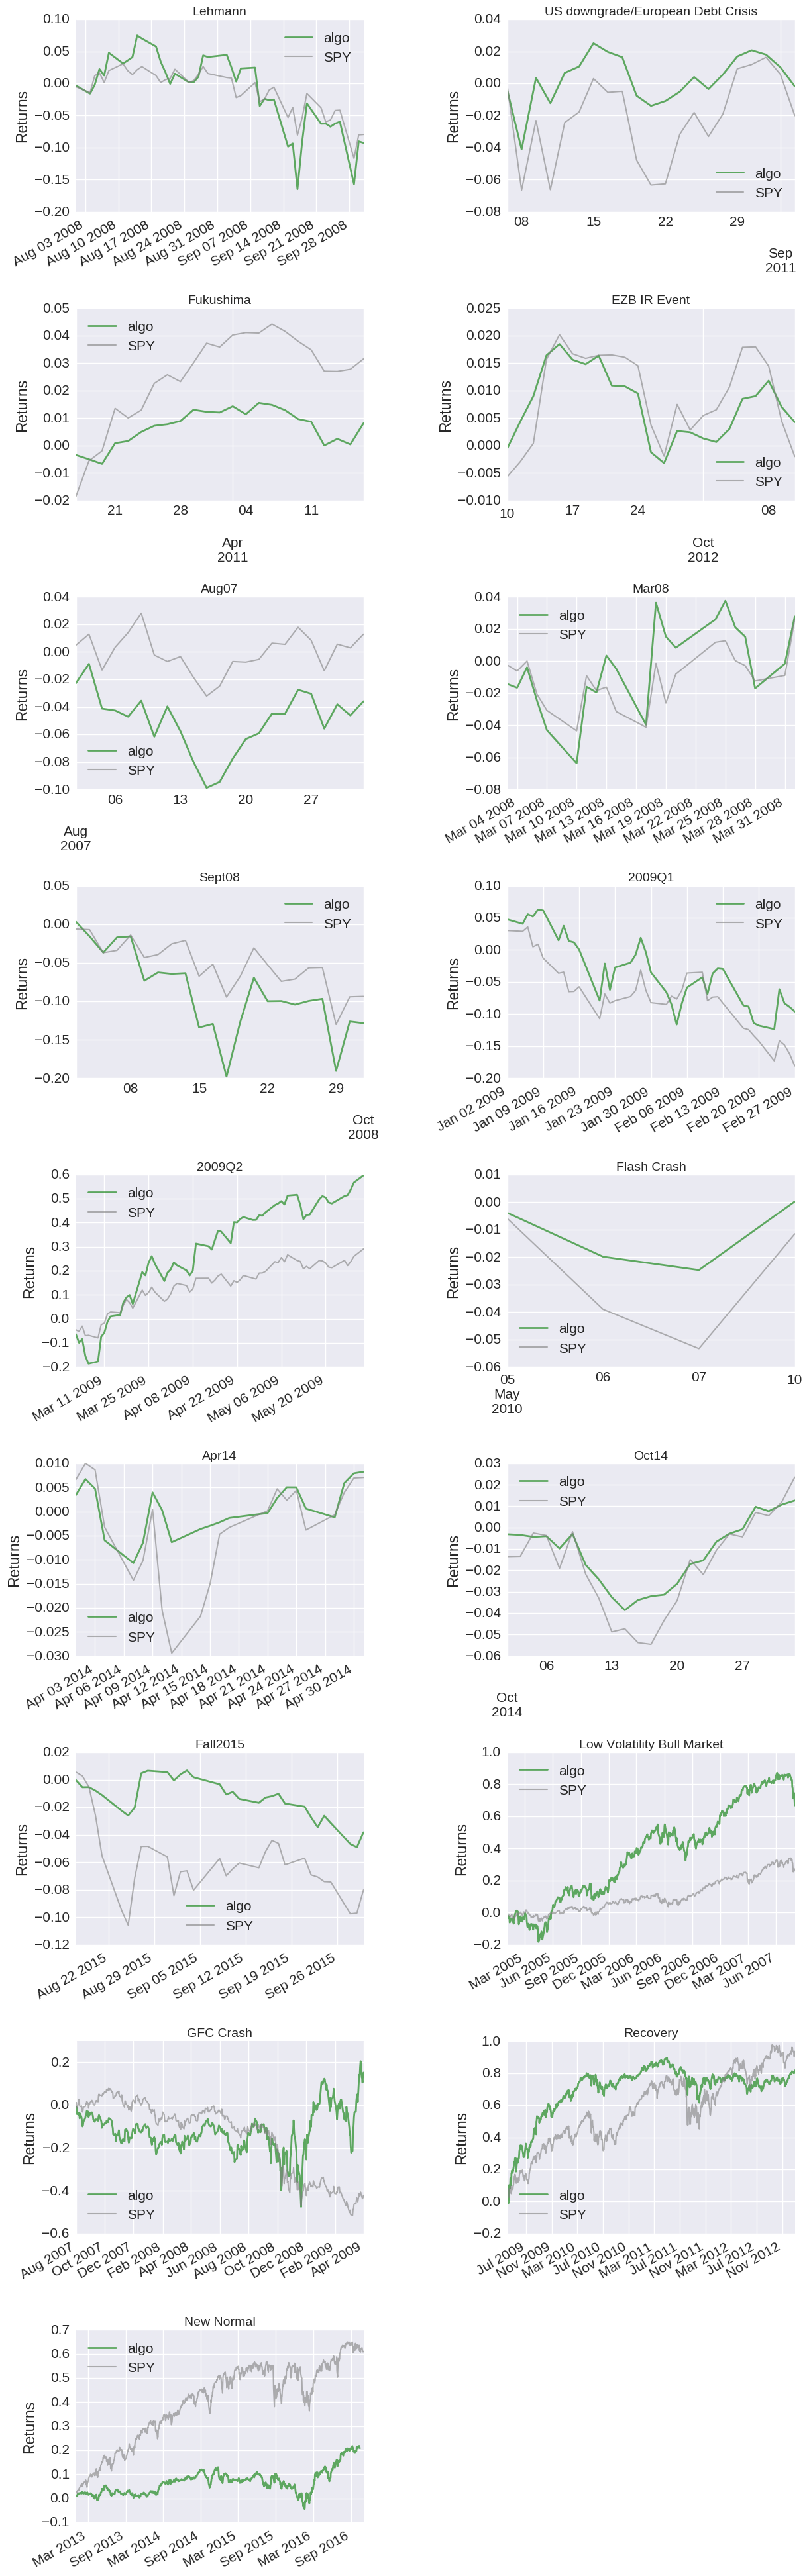

In [18]:
Bw.index=Bw.index.tz_localize('UTC')
pf.create_full_tear_sheet(Bw.NET_Return)

INFO:root:ran over 2971 days and 1913324 rows in 122 secs


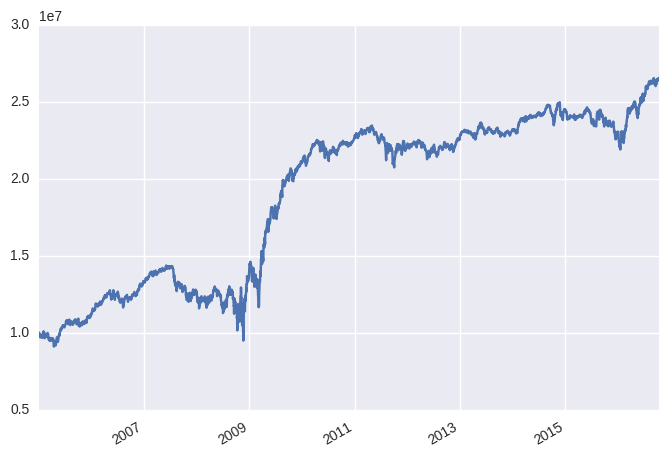

In [19]:
# let's see if we can give the trade more names to 
#   add capacity and reduce vol a bit

kvargs = {'num_names':20}

_,Bw20 = sim.sim(U, sim_FUN=sim.worst_strat ,kvargs=kvargs)
Bw20.NAV.plot(title="Buy yesterday's 20 worst")


Entire data start date: 2005-01-03
Entire data end date: 2016-10-14


Backtest Months: 141


Performance statistics   Backtest
annual_return                0.09
annual_volatility            0.15
sharpe_ratio                 0.61
calmar_ratio                 0.25
stability_of_timeseries      0.91
max_drawdown                -0.34
omega_ratio                  1.15
sortino_ratio                0.95
skew                         1.54
kurtosis                    30.55
tail_ratio                   1.00
common_sense_ratio           1.08
information_ratio            0.00
alpha                         nan
beta                          nan

Worst Drawdown Periods net drawdown in %  peak date valley date recovery date duration
0                                  33.97 2007-06-04  2008-11-20    2009-01-02      415
1                                  20.21 2009-01-08  2009-03-06    2009-03-23       53
2                                  12.30 2014-11-24  2016-01-19    2016-04-26      372
3                                  11.59 2011-05-02  2011-10-03    2013-05-20      536
4                                   9.63 2005-02-02  2005-04-15    2005-05-31       85



[-0.019 -0.04 ]


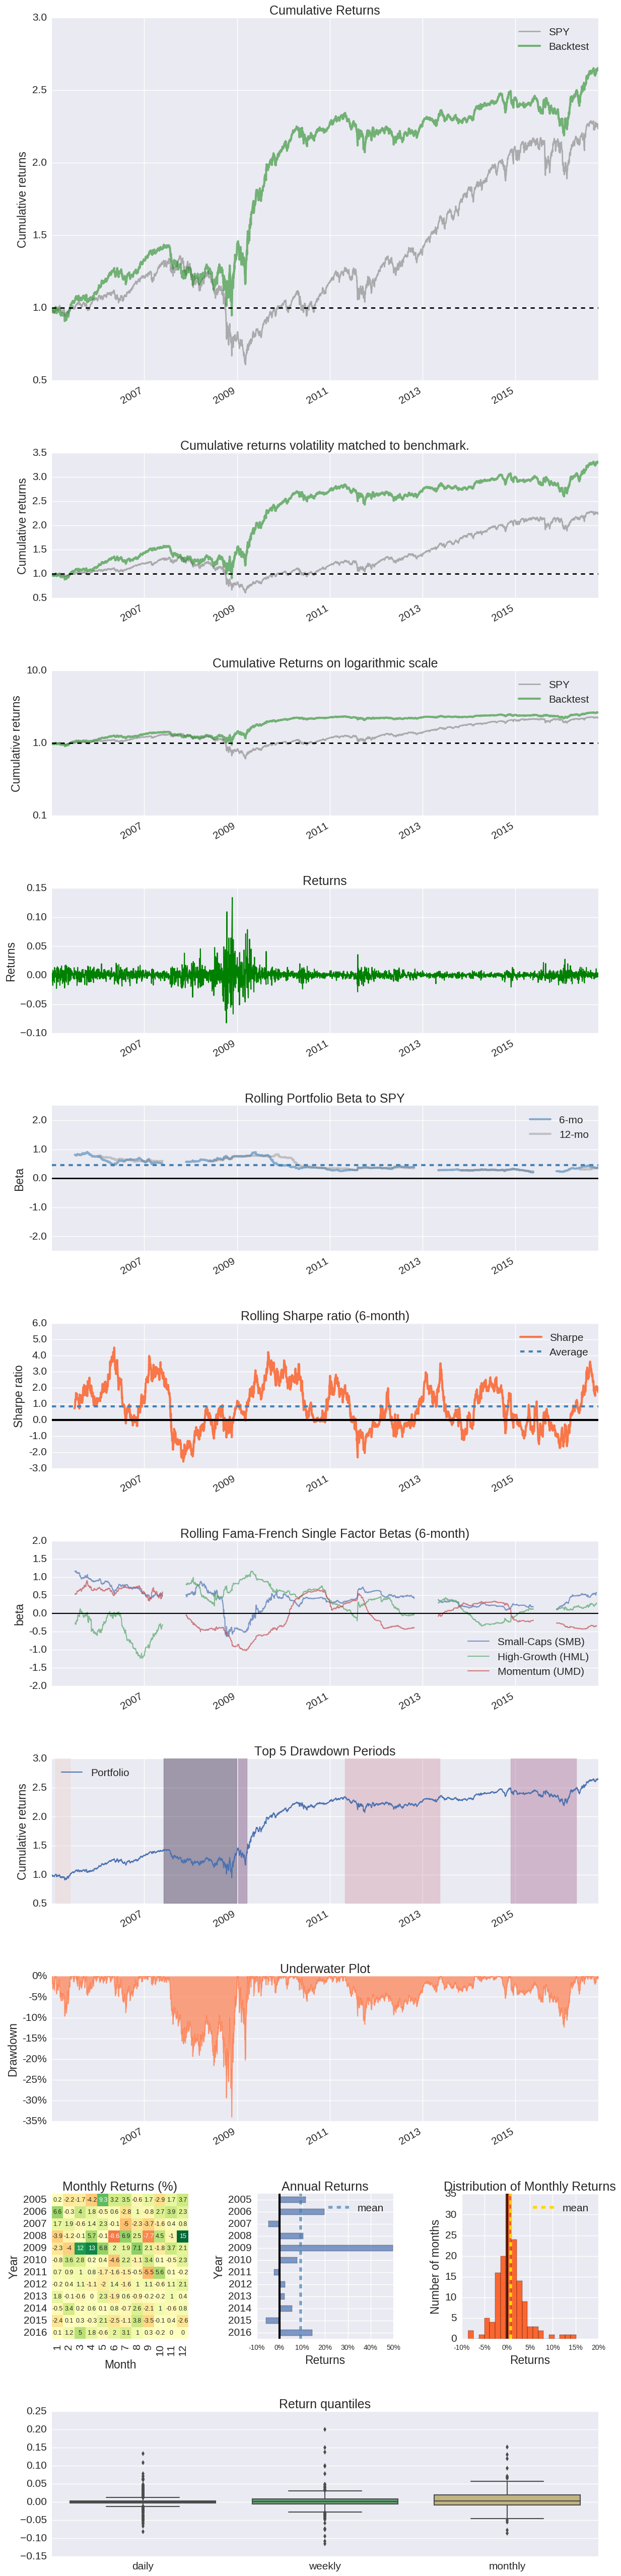

In [20]:
Bw20.index=Bw20.index.tz_localize('UTC')
pf.create_returns_tear_sheet(Bw20.NET_Return)


u'0.19.0'

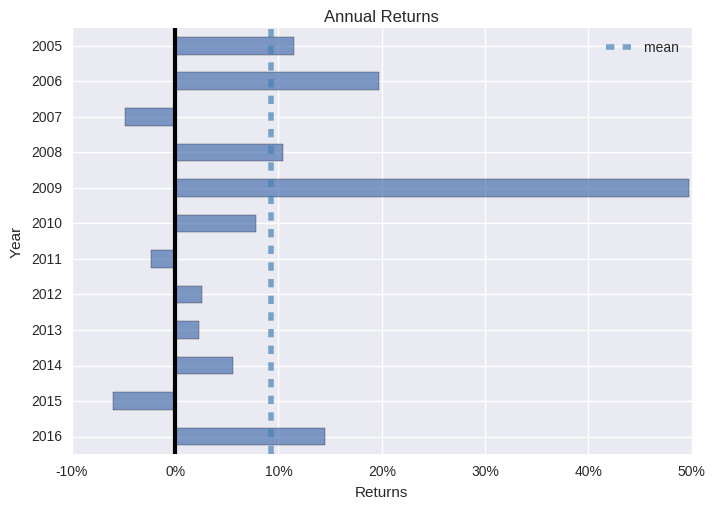

In [21]:
pf.plot_annual_returns(Bw20.NET_Return)
#.create_capacity_tear_sheet(Bw20.NET_Return)

INFO:root:ran over 2971 days and 1913324 rows in 118 secs


Entire data start date: 2005-01-03
Entire data end date: 2016-10-14


Backtest Months: 141


Performance statistics   Backtest
annual_return                0.07
annual_volatility            0.16
sharpe_ratio                 0.48
calmar_ratio                 0.16
stability_of_timeseries      0.86
max_drawdown                -0.41
omega_ratio                  1.12
sortino_ratio                0.74
skew                         1.92
kurtosis                    40.81
tail_ratio                   1.13
common_sense_ratio           1.21
information_ratio           -0.00
alpha                         nan
beta                          nan

Worst Drawdown Periods net drawdown in %  peak date valley date recovery date duration
0                                  40.95 2008-09-19  2009-03-06    2009-04-03      141
1                                  16.89 2013-10-22  2016-01-19    2016-08-12      734
2                                  16.47 2008-02-01  2008-07-15    2008-09-03      154
3                                  10.90 2010-04-23  2011-08-10    2013-05-06      792
4                                   9.01 2005-01-03  2005-04-28    2005-07-11      136



[-0.02 -0.05]


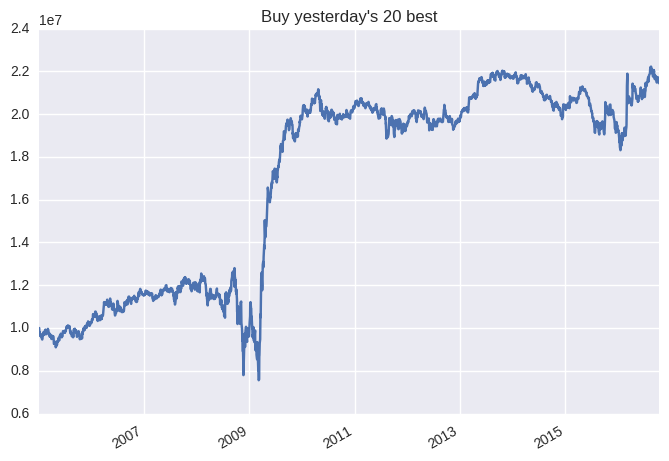

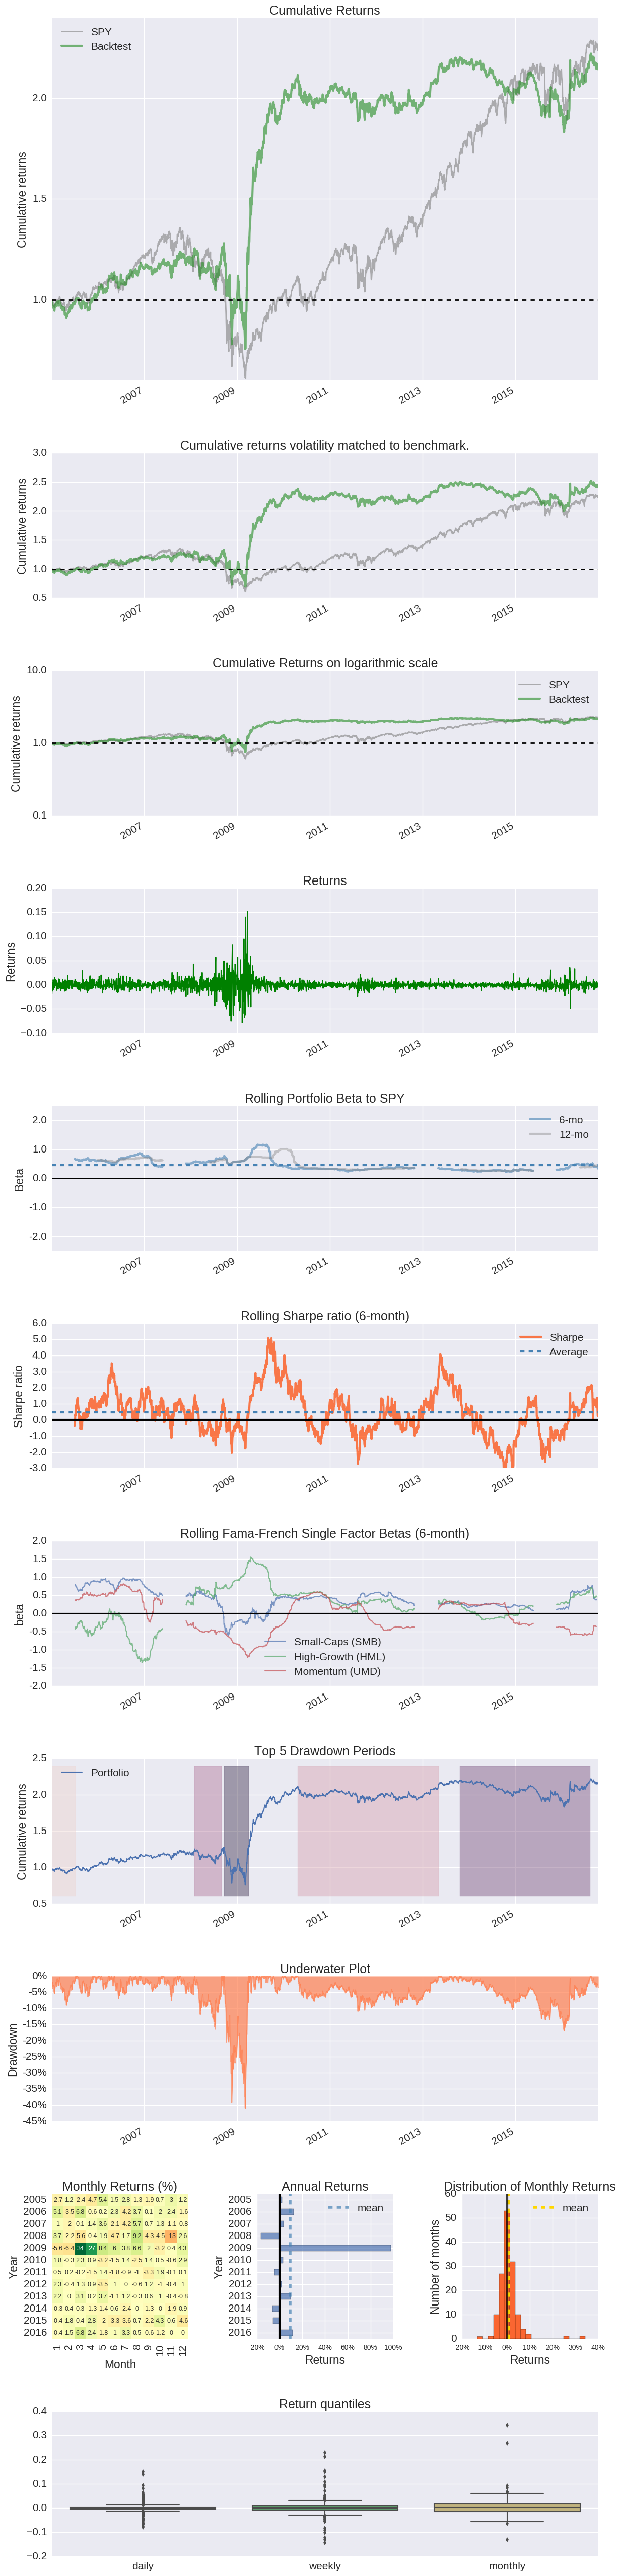

Stress Events                       mean    min    max
Lehmann                            0.14% -4.57%  4.96%
US downgrade/European Debt Crisis -0.01% -2.40%  2.14%
Fukushima                          0.00% -0.43%  0.69%
EZB IR Event                      -0.05% -0.76%  0.79%
Aug07                              0.25% -1.89%  2.57%
Mar08                             -0.15% -2.20%  2.57%
Sept08                            -0.14% -4.57%  4.96%
2009Q1                            -0.26% -7.79%  9.49%
2009Q2                             1.05% -6.70% 15.15%
Flash Crash                       -0.12% -1.10%  1.41%
Apr14                             -0.08% -1.22%  0.49%
Oct14                              0.00% -0.99%  0.68%
Fall2015                          -0.05% -1.49%  1.11%
Low Volatility Bull Market         0.02% -1.81%  2.95%
GFC Crash                          0.04% -7.79% 15.15%
Recovery                           0.06% -4.60%  5.88%
New Normal                         0.01% -4.92%  3.61%

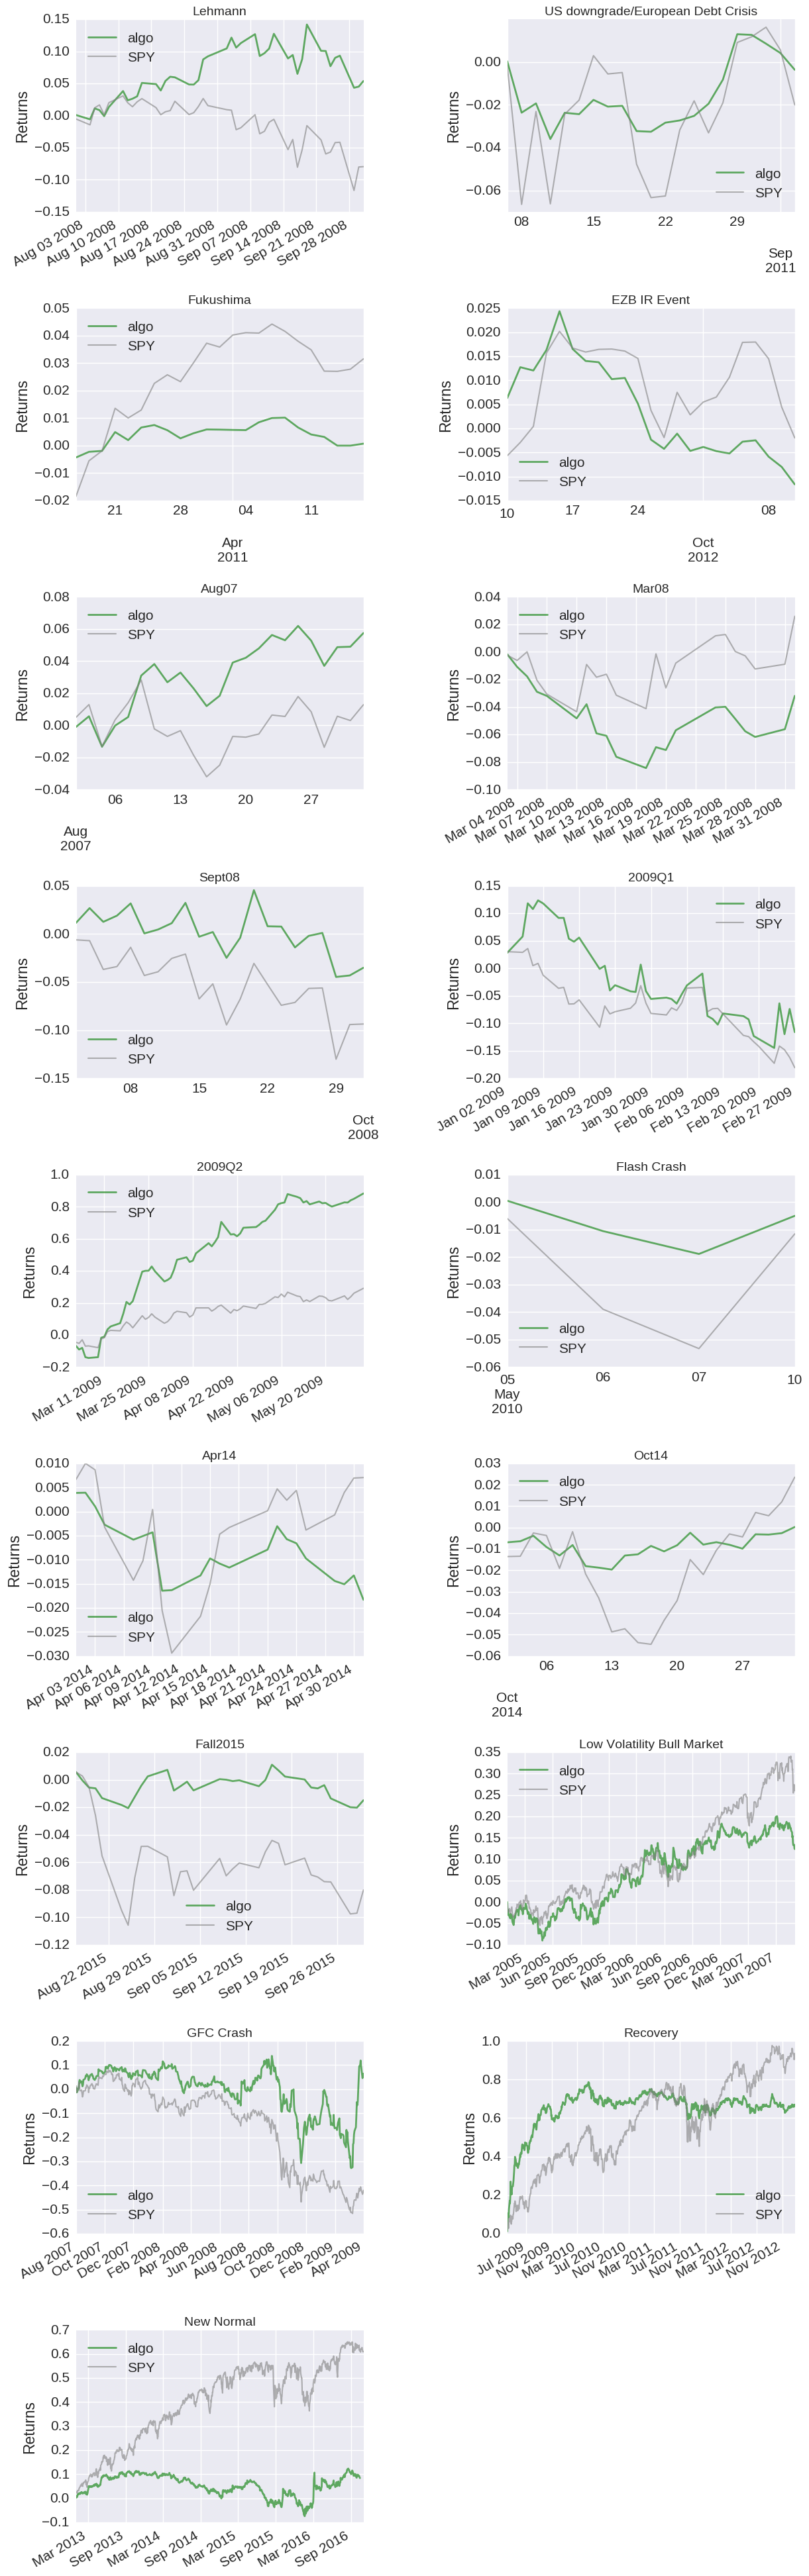

In [25]:
# let's bring the 'best' into this:
kvargs = {'num_names':20}

_,Bb20 = sim.sim(U, sim_FUN=sim.best_strat ,kvargs=kvargs)
Bb20.NAV.plot(title="Buy yesterday's 20 best")
Bb20.index=Bb20.index.tz_localize('UTC')
pf.create_full_tear_sheet(Bb20.NET_Return)


### Ok, so we've seen three basic strategies:

 1. Equal-Weight the universe & rebalance daily.
 2. Buy yesterday's worst.
 3. Buy yesterday's best.

None is especially good: only the second (barely) cracks .6 sharpe, all have vol of > 15% and returns of < 10% and all have suffered wrenching drawdowns.  

However, they've all done broadly better than the S&P in most environments with the unhappy exception of the so-called new normal.

Let's see if we can improve them just a bit as-is and then we'll see if we can apply any of our lessons from machine-learning to improve yet a bit more.



In [32]:
# let's aggregate returns and check correlations for fun
All = pd.concat( [ B.NET_Return, Bw20.NET_Return, Bb20.NET_Return], axis=1)
All.columns = ['EqWt', 'Bw20', 'Bb20']
All.head()
All.corr()


EqWt      Bw20      Bb20
EqWt  1.000000  0.832260  0.773493
Bw20  0.832260  1.000000  0.631711
Bb20  0.773493  0.631711  1.000000

In [33]:
# ...

